In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.measure import regionprops
import numpy as np
from flask import current_app, jsonify
import os

In [86]:
def check_image(img):
    img = cv2.imread(img)
    img = cv2.resize(img, (1560, 2080), cv2.INTER_LINEAR)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 6)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    img_contours = img.copy()
    img_contours = cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)
    
    x_list = []

    for idx, cnt in enumerate(contours):
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
#         print(f"Contour {idx}: {len(approx)} points")  # Debugging point count
        if len(approx) > 3 and len(approx) < 1000:
            x, y, w, h = cv2.boundingRect(cnt)
            ratio = float(w) / h
#             print(f"Contour {idx}: x={x}, y={y}, w={w}, h={h}, ratio={ratio}")  # Debugging bounding rect and ratio
            if ratio <= 0.9 or ratio >= 1.2:
                if w > 150 and w < 300 and y > 500 and h > 180 and h < 390:
                    x_list.append({"idx": idx, "x": x, "y": y, "w": w, "h": h})
#                     print(f"Contour {idx} added to list")  # Debugging contour added
#         print("-----------")

                    
    formatted_data = [[item['x'], item['y'], item['w'], item['h']] for item in x_list]
    formatted_data_sorted = sorted(formatted_data, key=lambda o: o[0])
    
    if formatted_data_sorted:
        boxes = np.array(formatted_data_sorted)
        scores = np.ones((len(boxes),))
        indices = cv2.dnn.NMSBoxes(boxes.tolist(), scores.tolist(), score_threshold=0.5, nms_threshold=0.4).tolist()
        boxes_list = boxes.tolist()
        nms_boxes = [boxes_list[i] for i in indices]

    else:
        nms_boxes = []
        
    for idx, ttd in enumerate(nms_boxes):
        org = (int(ttd[0]), int(ttd[1]))
        cv2.rectangle(img, ttd, (0,0,255), 1)
        cv2.putText(img, str(idx), org, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
        
    img_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_contours)
    plt.title('Gambar dengan Kontur')
    plt.axis('off')
    plt.show()

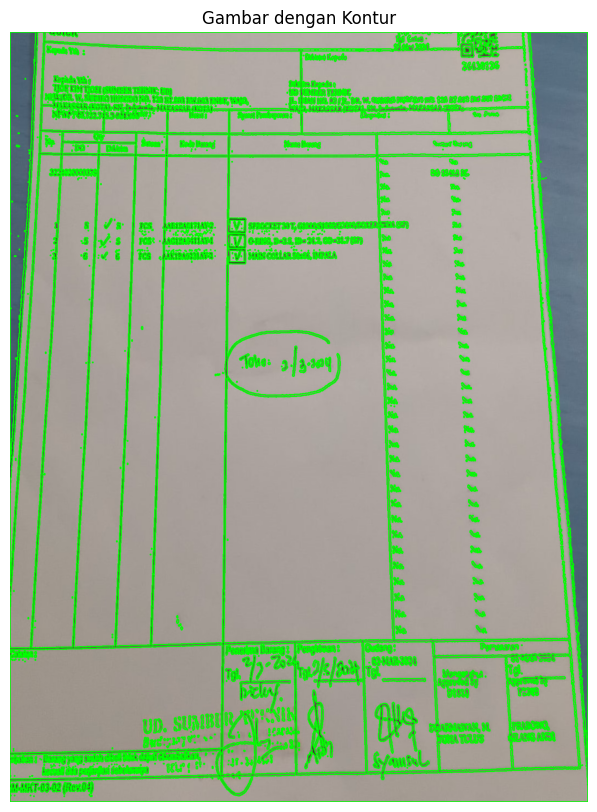

In [87]:
dir_test = "foto/"
for img in os.listdir(dir_test):
    img_path = f"{dir_test}/{img}"
#     image = cv2.imread(img_path)
#     print(image.shape)
    
    check_image(img_path)

In [52]:
img = 'upload/raw/DOSPB_24454078_1.jpeg'
img = cv2.imread(img)

In [53]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 6)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
img_contours = img.copy()
img_contours = cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

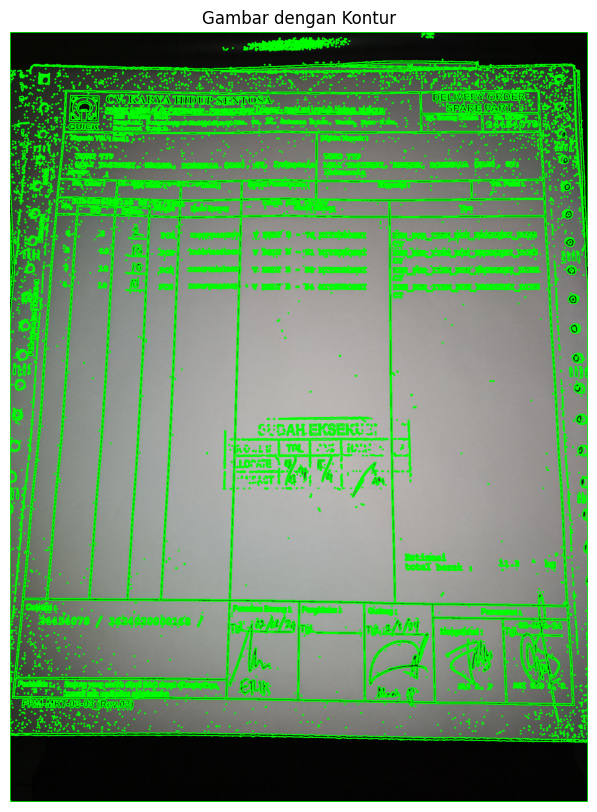

In [55]:
img_contours_rgb = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_contours_rgb)
plt.title('Gambar dengan Kontur')
plt.axis('off')
plt.show()

In [56]:
 x_list = []

for idx, cnt in enumerate(contours):
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    if len(approx) > 3 and len(approx) < 1000:
        x, y, w, h = cv2.boundingRect(cnt)
        ratio = float(w) / h
        if ratio <= 0.9 or ratio >= 1.1:
            if w > 120 and w < 300 and y > 500 and h > 130 and h < 300:
                x_list.append({"idx": idx, "x": x, "y": y, "w": w, "h": h})

In [57]:
x_list

[{'idx': 2310, 'x': 1331, 'y': 1586, 'w': 138, 'h': 229},
 {'idx': 2343, 'x': 1143, 'y': 1584, 'w': 196, 'h': 229},
 {'idx': 2431, 'x': 957, 'y': 1543, 'w': 189, 'h': 267},
 {'idx': 2453, 'x': 969, 'y': 1623, 'w': 161, 'h': 141},
 {'idx': 2497, 'x': 779, 'y': 1540, 'w': 178, 'h': 266},
 {'idx': 2536, 'x': 585, 'y': 1537, 'w': 194, 'h': 266}]

In [58]:
x_list = sorted(x_list, key=lambda o: o["x"])

In [59]:
x_list

[{'idx': 2536, 'x': 585, 'y': 1537, 'w': 194, 'h': 266},
 {'idx': 2497, 'x': 779, 'y': 1540, 'w': 178, 'h': 266},
 {'idx': 2431, 'x': 957, 'y': 1543, 'w': 189, 'h': 267},
 {'idx': 2453, 'x': 969, 'y': 1623, 'w': 161, 'h': 141},
 {'idx': 2343, 'x': 1143, 'y': 1584, 'w': 196, 'h': 229},
 {'idx': 2310, 'x': 1331, 'y': 1586, 'w': 138, 'h': 229}]

In [60]:
formatted_data = [[item['x'], item['y'], item['w'], item['h']] for item in x_list]
nms_boxes = sorted(formatted_data, key=lambda o: o[0])

In [61]:
nms_boxes

[[585, 1537, 194, 266],
 [779, 1540, 178, 266],
 [957, 1543, 189, 267],
 [969, 1623, 161, 141],
 [1143, 1584, 196, 229],
 [1331, 1586, 138, 229]]

In [62]:
# boxes = np.array(formatted_data_sorted)
# scores = np.ones((len(boxes),))


# indices = cv2.dnn.NMSBoxes(boxes.tolist(), scores.tolist(), score_threshold=0.5, nms_threshold=0.4).tolist()
# boxes_list = boxes.tolist()
# nms_boxes = [boxes_list[i] for i in indices]

In [63]:
nms_boxes

[[585, 1537, 194, 266],
 [779, 1540, 178, 266],
 [957, 1543, 189, 267],
 [969, 1623, 161, 141],
 [1143, 1584, 196, 229],
 [1331, 1586, 138, 229]]

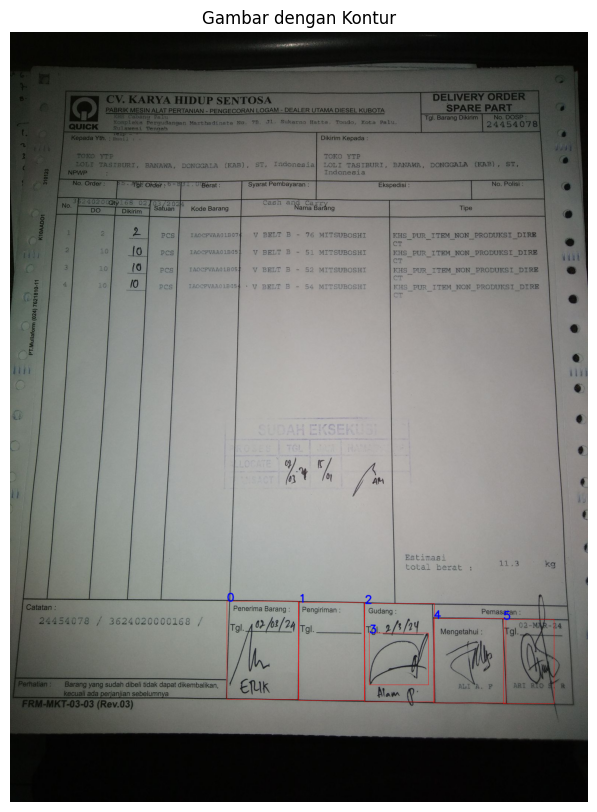

In [64]:
for idx, ttd in enumerate(nms_boxes):
    org = (int(ttd[0]), int(ttd[1]))
    cv2.rectangle(img, ttd, (0,0,255), 1)
    cv2.putText(img, str(idx), org, cv2.FONT_HERSHEY_SIMPLEX,
                   1, (255,0,0), 2, cv2.LINE_AA)
    
    
img_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_plot)
plt.title('Gambar dengan Kontur')
plt.axis('off')
plt.show()

In [ ]:
number = 10
data = []
while number != 0:
    data.append(number)
    number -= 1
    
print(data)

In [ ]:
x, y, z = 1, 100, 3

if (x < y and  x < z):
    print("x bilangan terkecil")
    if y < z:
        print("z bilangan terbesar")
    else:
        print("y bilangan terbesar") 
        
elif (y < x and y < z):
    print("y bilangan terkecil")
    if x < z:
        print("z bilangan terbesar")
    else:
        print("x bilangan terbesar")
        
else:
    print("z bilangan terkecil")
    if x < y:
        print("y bilangan terbesar")
    else:
        print("x bilangan terbesar")
        
def sumarize(x, y, z):
    return x + y + z

def average(x, y, z):
    return (x + y + z)/2

result_sumarize = sumarize(x,y,z)
result_average = average(x,y,z)
print(f"Sumarize: {result_sumarize}, Average: {result_average}")

In [ ]:
number = 1

result = []
while True:
    result.append(number)
    number *= 2
    if number >= 10000:
        break
        
print(result)

In [ ]:
result

In [ ]:
i = 1
for (i, i<6, i ):
    print(i)

In [ ]:
for i in range(1, 6):
    for a in range(1, 7 - i):
        print(i, end='')
    print(" ")


In [ ]:
while True:
    